In [1]:
def convBool(v):
    return v == "true"

def lerDataset(fnome):
    f = open(fnome, encoding="utf-8")
    bd = []
    f.readline()
    for linha in f:
        emd=[]
        novaLinha = linha.strip("\n")
        campos = novaLinha.split(",")
        emd.append("emd" + str(campos[1]))
        emd.append(campos[2])
        emd.append(campos[4] + " " + campos[3])
        emd = emd + campos[5:]
        emd[-1] = convBool(emd[-1])
        emd[-2] = convBool(emd[-2])
        bd.append(emd)
    return bd
#lerDataset("emd.csv")

In [2]:
def listarDataset(bd):
    Lista=[]
    #print("id    nome         data     resultado")
    #print("--------------------------------------")
    for e in bd:
        if e[-1]:
            res = "Apto"
        else:
            res = "Não"
        r=(e[0] + "|" + e[2] + "|" + e[1] + "|" + res)
        Lista.append(str(r))
    return (Lista)
#listarDataset(lerDataset("emd.csv"))

In [3]:
def consultarDataset(bd):
    resposta=input("Introduza o id do aluno (c/ parênteses):")
    encontrado=False
    
    for linha in bd:
        if  linha[0] == resposta:
            #print("  id   |    nome    |    data    | resultado")
            #print("---------------------------------------------")
            for e in bd:
                if e[-1]:
                    res = "Apto"
                else:
                    res = "Não"
            r=(linha[0] + "|" + linha[2] + "|" + linha[1] + "|" + res)
            encontrado=True
    if encontrado==False:
        print("Não existe nenhum aluno com esse id!")
#consultarDataset(lerDataset("emd.csv"))

In [4]:
def modalidades(bd):
    listaMod=[]
    for e in bd:
        if e[6] not in listaMod:
            listaMod.append(e[6])
    listaMod.sort()
    return listaMod
#modalidades(lerDataset("emd.csv"))

In [5]:
def distribPorModalidade(bd):
    distribuicao={}
    for e in bd:
        if e[6] in distribuicao.keys():
            distribuicao[e[6]] = distribuicao[e[6]]+1
        else:
            distribuicao[e[6]] = 1
    return distribuicao
#distribPorModalidade(lerDataset("emd.csv"))

In [6]:
def distribPorClube(bd):
    distribuicao={}
    for e in bd:
        if e[7] in distribuicao.keys():
            distribuicao[e[7]] = distribuicao[e[7]]+1
        else:
            distribuicao[e[7]] = 1
    return distribuicao
#distribPorClube(lerDataset("emd.csv"))

In [7]:
def distribPorAno(bd):
    distribuicao={}
    for e in bd:
        ano = e[1][0:4]
        if ano in distribuicao.keys():
            distribuicao[ano] = distribuicao[ano] + 1
        else:
            distribuicao[ano] = 1
    return distribuicao
#distribPorAno(lerDataset("emd.csv"))

In [8]:
def distrib(bd, index):
    distribuicao={}
    for e in bd:
        if e[index] in  distribuicao.keys():
            distribuicao[e[index]]=distribuicao[e[index]]+1
        else:
            distribuicao[e[index]]=1
    return distribuicao

#distrib(lerDataset("emd.csv"), 7)

In [9]:
import matplotlib.pyplot as plt 
def plotDistribPorModalidade(distrib):
    modalidade = distrib.keys()
    nPessoas = distrib.values()
    plt.xlabel("Modalidades")
    plt.ylabel("Nº de pessoas")
    plt.title("Distribuição por modalidade:")
    plt.bar(modalidade,nPessoas, color="pink")
    plt.xticks(rotation=90)
    plt.show()
#plotDistribPorModalidade(distribPorModalidade(lerDataset("emd.csv")))

In [10]:
import matplotlib.pyplot as plt 
#index=int(input("""Selecione o número do que pretende fazer a distribuição:
#                 (6)Modalidade
#                 (7)Clube
#                 (9)Federados
#                 (10)Resulatado do exame
#                 """))
def plotDistrib(distrib,index):
    if index == 6:
        texto = "Modalidade"
    elif index == 7:
        texto = "Clube"
    elif index == 9:
        texto = "Federados"
    elif index == 10:
        texto = "Resultado exame"
    if index == 9 or index == 10:
        x = ["True", "False"]
        y = distrib.values()
        plt.xlabel(texto)
        plt.ylabel("Nº de pessoas")
        plt.title("Distribuição :")
        plt.bar(x , y , color="pink")
        plt.xticks(rotation=90)
        plt.show()
    else:
        x = distrib.keys()
        y = distrib.values()
        plt.xlabel(texto)
        plt.ylabel("Nº de pessoas")
        plt.title("Distribuição :")
        plt.bar(x , y , color="pink")
        plt.xticks(rotation=90)
        plt.show()
#plotDistrib(distrib(lerDataset("emd.csv"),index))

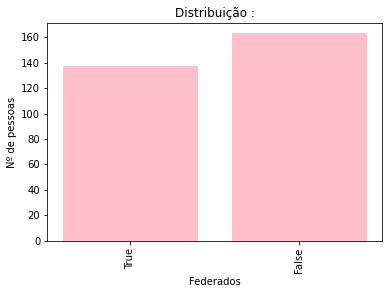

In [15]:
import PySimpleGUI as sg
def janelaErro(mensagem):
    interface=[[sg.Text(mensagem)], [sg.Button("Sair")]]
    window= sg.Window(title="Mesagem de erro", font=("Arial",30), default_element_size=(15,1)).Layout(interface)

    stop=False  
    while not stop:
        event, values = window.read()
        if event == "Sair" or event == sg.WIN_CLOSED:
            stop = True
    window.close()
    
bd=lerDataset("emd.csv")
linhasInterface= [  
            [sg.Button("Listar Dataset", font=("Arial",20))],
            [sg.Button("Distribuições", font=("Arial",20))],
            [sg.Button("Visualizar gráficos", font=("Arial",20))],
            [sg.Button("Sair", size=(20,1))],
            ]

window=sg.Window(title="Interface",font="Arial",margins=(300,30), default_element_size=(20,1)).Layout(linhasInterface)
stop=False

while not stop:
    event, values= window.read()
    if event == "Sair" or event == sg.WIN_CLOSED:
        stop = True
        
    elif event=="Listar Dataset":
        interfaceListar= [[sg.Button("Listar por data/exames"), sg.Button("Listar modalidades")]]
        windowListar=sg.Window("Listar Dataset", interfaceListar)
        escolha1, valores1= windowListar.read(close=True)
        if escolha1=="Listar por data/exames":
            listaExa=listarDataset(bd)
            interface_exa= [[sg.Text(listaExa, size=(100,30)), sg.Button("Sair")]]
            window_exa=sg.Window("Listar por data/exames", interface_exa)
            event1, values1=window_exa.read(close=True)
        if escolha1=="Listar modalidades":
            listaMod=modalidades(bd)
            interfaceListaMod=[[sg.Listbox(listaMod, size=(100,30)), sg.Button("Sair")]]
            windowMod=sg.Window("Listar modalidades", interfaceListaMod)
            event2, values2=windowMod.read(close=True)
    elif event=="Distribuições":
        interfaceDist= [[sg.Button("Distribuições por modalidades"), sg.Button("Distribuições por clubes"), sg.Button("Distribuições por anos")]]
        windowDist=sg.Window("Distribuições", interfaceDist)
        escolha2, valores2= windowDist.read(close=True)
        if escolha2=="Distribuições por modalidades":
            distribMod=distribPorModalidade(bd)
            interfaceDistMod= [[sg.Text(distribMod, size=(50,20)), sg.Button("Sair")]]
            windowDistMod=sg.Window("Distribuições por modalidades", interfaceDistMod)
            event3, values3=windowDistMod.read(close=True)
        if escolha2=="Distribuições por clubes":
            distribClu=distribPorClube(bd)
            interfaceDisClu=[[sg.Listbox(distribClu, size=(50,20)), sg.Button("Sair")]]
            windowDistClu=sg.Window("Distribuições por clubes", interfaceDisClu)
            event4, values4=windowDistClu.read(close=True)
        if escolha2=="Distribuições por anos":
            distribAno=distribPorAno(bd)
            interfaceDistAno=[[sg.Listbox(distribAno, size=(50,20)), sg.Button("Sair")]]
            windowDistAno=sg.Window("Distribuições por anos", interfaceDistAno)
            event5, values5=windowDistAno.read(close=True)
    elif event=="Visualizar gráficos":
        interfaceGraf= [[sg.Button("Modalidades"), sg.Button("Clube"), sg.Button("Federados"), sg.Button("Exames")]]
        windowGraf=sg.Window("Listar Dataset", interfaceGraf)
        escolha3, valores3= windowGraf.read(close=True)
        if escolha3=="Modalidades":
            GrafMod=plotDistribPorModalidade(distribPorModalidade(bd))
            w=sg.Window("Gráfico da distribuição por modalidades", plt.show(GrafMod))
        if escolha3=="Clube":
            GrafClu=plotDistrib(distrib(bd,7),7)
            w1=sg.Window("Gráfico da distribuição por clube", plt.show(GrafClu))
        if escolha3=="Federados":
            GrafFed=plotDistrib(distrib(bd,9),9)
            w2=sg.Window("Gráfico da distribuição por federados", plt.show(GrafFed))
        if escolha3=="Exames":
            GrafExa=plotDistrib(distrib(bd,10),10)
            w3=sg.Window("Gráfico da distribuição por exames", plt.show(GrafExa))
window.close()